<a href="https://colab.research.google.com/github/pavanimudireddy/HDB-Flat-Value-Predictor/blob/main/M_Pavani_HDB_capestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import zipfile
import io

# Upload ZIP file
uploaded = files.upload()

# Initialize list to store CSVs
dfs = []

# Process the first uploaded ZIP file
zip_name = next(iter(uploaded))
with zipfile.ZipFile(io.BytesIO(uploaded[zip_name])) as z:
    print("Files in ZIP:", z.namelist())
    for file in z.namelist():
        if file.endswith(".csv"):
            dfs.append(pd.read_csv(z.open(file)))

# Combine all CSVs into a single DataFrame
if dfs:
    data = pd.concat(dfs, ignore_index=True)
    print("✅ Combined DataFrame created successfully.")
else:
    raise ValueError("No CSV files found in the ZIP.")


Saving ResaleFlatPrices.zip to ResaleFlatPrices.zip
Files in ZIP: ['Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv', 'Resale flat prices based on registration date from Jan-2017 onwards.csv', 'Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv', 'Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv', 'Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv']
✅ Combined DataFrame created successfully.


In [ ]:
data.shape

(963856, 11)

In [ ]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
963851,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,NaN,476888.0
963852,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,NaN,490000.0
963853,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,NaN,488000.0
963854,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,NaN,705000.0


In [ ]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [ ]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,709050


In [ ]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,963856.000000,963856.000000,9.638560e+05
mean,95.669280,1988.658834,3.329406e+05
std,25.756877,11.042878,1.821841e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.980000e+05
50%,93.000000,1986.000000,3.050000e+05
75%,113.000000,1996.000000,4.300000e+05
max,366.700000,2022.000000,1.658888e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                963856 non-null  object 
 1   town                 963856 non-null  object 
 2   flat_type            963856 non-null  object 
 3   block                963856 non-null  object 
 4   street_name          963856 non-null  object 
 5   storey_range         963856 non-null  object 
 6   floor_area_sqm       963856 non-null  float64
 7   flat_model           963856 non-null  object 
 8   lease_commence_date  963856 non-null  int64  
 9   remaining_lease      254806 non-null  object 
 10  resale_price         963856 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 80.9+ MB


In [ ]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
data['month'] = pd.to_datetime(data['month'])
data['year'] = data['month'].dt.year
data['month_num'] = data['month'].dt.month
#Machine learning models cannot interpret dates directly.By breaking a date into numerical components (year, month), the model can learn temporal trends — e.g., how prices change over years or months.

In [ ]:
data=data.drop(columns=['month'])

In [ ]:
data.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year', 'month_num'],
      dtype='object')

In [ ]:
data.nunique()

,0
town,27
flat_type,8
block,2746
street_name,593
storey_range,25
floor_area_sqm,225
flat_model,34
lease_commence_date,57
remaining_lease,742
resale_price,10075


In [ ]:
data.remaining_lease.isnull().sum()

np.int64(709050)

In [ ]:
import pandas as pd
data['lease_commence_date'] = pd.to_numeric(data['lease_commence_date'], errors='coerce')
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['calculated_remaining_lease'] = (data['lease_commence_date'] + 99) - data['year']
data['remaining_lease'] = pd.to_numeric(data['remaining_lease'], errors='coerce')
data['remaining_lease'] = data['remaining_lease'].fillna(data['calculated_remaining_lease'])
data = data.drop(columns=['calculated_remaining_lease'])
data['remaining_lease'] = data['remaining_lease'].round(0).astype('Int64')

#Missing lease information can distort model learning.By estimating the remaining lease from the commencement year,  restore consistency without dropping valuable rows.

In [ ]:
data.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year', 'month_num'],
      dtype='object')

In [ ]:
data.remaining_lease.isnull().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
remaining_lease,Int64
resale_price,float64


In [ ]:
data['storey_low'] = data['storey_range'].str.split(' TO ').apply(lambda x: int(x[0]))
data['storey_high'] = data['storey_range'].str.split(' TO ').apply(lambda x: int(x[1]))
data = data.drop(columns=['storey_range'])


In [ ]:
data.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_num,storey_low,storey_high
0,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,60.0,Improved,1986,70,255000.0,2015,1,7,9
1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,68.0,New Generation,1981,65,275000.0,2015,1,1,3
2,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,69.0,New Generation,1980,64,285000.0,2015,1,1,3
3,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,68.0,New Generation,1979,63,290000.0,2015,1,1,3
4,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,68.0,New Generation,1980,64,290000.0,2015,1,7,9


**Categorical columns**

In [ ]:
data.block.value_counts()

,count
block,
2,4689
1,4149
110,3497
101,3473
4,3428
...,...
479A,7
609D,6
226E,2


In [ ]:
data.flat_type.value_counts()

,count
flat_type,
4 ROOM,368223
3 ROOM,304925
5 ROOM,203933
EXECUTIVE,71931
2 ROOM,12979
1 ROOM,1316
MULTI GENERATION,279
MULTI-GENERATION,270


In [ ]:
data["flat_type"]=data['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')

In [ ]:
data.flat_type.value_counts()

,count
flat_type,
4 ROOM,368223
3 ROOM,304925
5 ROOM,203933
EXECUTIVE,71931
2 ROOM,12979
1 ROOM,1316
MULTI GENERATION,549


In [ ]:
data.town.value_counts()

,count
town,
TAMPINES,82685
YISHUN,72517
JURONG WEST,69110
BEDOK,68373
WOODLANDS,68137
ANG MO KIO,53517
HOUGANG,52626
BUKIT BATOK,46484
CHOA CHU KANG,39913


In [ ]:
data.street_name.value_counts()

,count
street_name,
YISHUN RING RD,18077
BEDOK RESERVOIR RD,15053
ANG MO KIO AVE 10,14145
ANG MO KIO AVE 3,12424
HOUGANG AVE 8,9615
...,...
SEMBAWANG WAY,15
GEYLANG EAST AVE 2,15
OUTRAM HILL,9


In [ ]:
data.flat_model.value_counts()

,count
flat_model,
Model A,209319
Improved,176907
New Generation,114300
NEW GENERATION,78898
IMPROVED,73589
MODEL A,70381
Premium Apartment,50433
Simplified,35671
Apartment,26717


In [ ]:
mapping = {
    # Model A variations
    'Model A': 'MODEL A',
    'MODEL A': 'MODEL A',
    'Model A2': 'MODEL A',
    'Model A-Maisonette': 'MODEL A-MAISONETTE',
    'MODEL A-MAISONETTE': 'MODEL A-MAISONETTE',

    # Improved variations
    'Improved': 'IMPROVED',
    'IMPROVED': 'IMPROVED',
    'Improved-Maisonette': 'IMPROVED-MAISONETTE',
    'IMPROVED-MAISONETTE': 'IMPROVED-MAISONETTE',

    # New Generation variations
    'New Generation': 'NEW GENERATION',
    'NEW GENERATION': 'NEW GENERATION',

    # Premium Apartment
    'Premium Apartment': 'PREMIUM APARTMENT',
    'PREMIUM APARTMENT': 'PREMIUM APARTMENT',
    'Premium Apartment Loft': 'PREMIUM APARTMENT LOFT',

    # Simplified / Standard
    'Simplified': 'STANDARD',
    'SIMPLIFIED': 'STANDARD',
    'Standard': 'STANDARD',
    'STANDARD': 'STANDARD',

    # Apartment / Maisonette
    'Apartment': 'APARTMENT',
    'APARTMENT': 'APARTMENT',
    'Maisonette': 'MAISONETTE',
    'MAISONETTE': 'MAISONETTE',

    # DBSS
    'DBSS': 'DBSS',

    # Adjoined flat
    'Adjoined flat': 'ADJOINED FLAT',

    # Type S
    'Type S1': 'TYPE S1',
    'Type S2': 'TYPE S2',

    # Terrace / Multi Generation / 2-room / 3Gen
    'Terrace': 'TERRACE',
    'TERRACE': 'TERRACE',
    'MULTI GENERATION': 'MULTI GENERATION',
    'Multi Generation': 'MULTI GENERATION',
    '2-room': '2-ROOM',
    '2-ROOM': '2-ROOM',
    '3Gen': '3GEN',
}


In [ ]:
data['flat_model'] = data['flat_model'].map(mapping).fillna('OTHER')


In [ ]:
data['flat_model'].value_counts()


,count
flat_model,
MODEL A,290218
IMPROVED,250496
NEW GENERATION,193198
STANDARD,102354
PREMIUM APARTMENT,50439
APARTMENT,36618
MAISONETTE,30543
DBSS,3776
MODEL A-MAISONETTE,2132


In [ ]:
data.duplicated().sum()

np.int64(2000)

In [ ]:

data.drop_duplicates(inplace=True)


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
town,object
flat_type,object
block,object
street_name,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
remaining_lease,Int64
resale_price,float64
year,int32


**Outliers**

**'floor_area_sqm'**

In [ ]:
Q1 = data['floor_area_sqm'].quantile(0.25)
Q3 = data['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['floor_area_sqm'] < lower_bound) | (data['floor_area_sqm'] > upper_bound)]['floor_area_sqm']
print(f"Number of outliers in {'floor_area_sqm'} before clipping:", len(outliers))

Number of outliers in floor_area_sqm before clipping: 2474


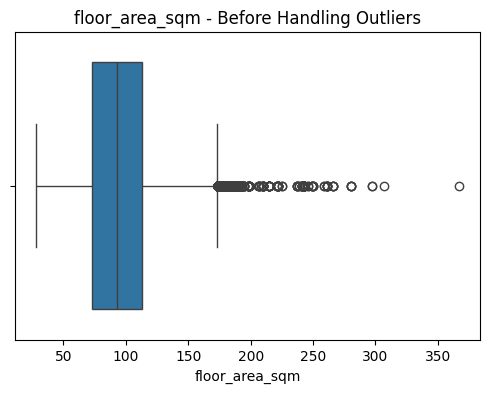

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='floor_area_sqm', data=data)  # x is column name, data is the DataFrame
plt.title("floor_area_sqm - Before Handling Outliers")
plt.show()

#Outliers can distort regression models.Clipping retains data while reducing skew and model sensitivity to extreme points.

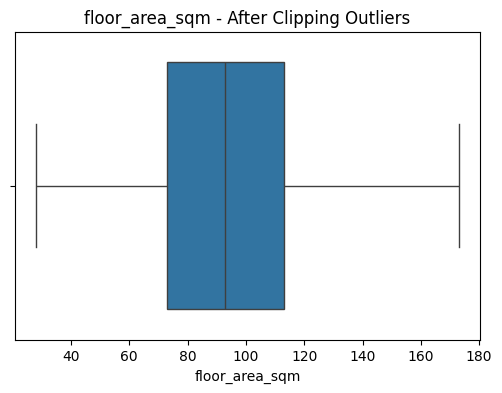

Number of outliers in floor_area_sqm after clipping: 0


In [ ]:
data['floor_area_sqm'] = data['floor_area_sqm'].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(x='floor_area_sqm', data=data)
plt.title(f"{'floor_area_sqm'} - After Clipping Outliers")
plt.show()

outliers_after = data[(data['floor_area_sqm'] < lower_bound) | (data['floor_area_sqm'] > upper_bound)]['floor_area_sqm']
print(f"Number of outliers in {'floor_area_sqm'} after clipping:", len(outliers_after))

**lease_commence_date**

In [ ]:
Q1 = data['lease_commence_date'].quantile(0.25)
Q3 = data['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['lease_commence_date'] < lower_bound) | (data['lease_commence_date'] > upper_bound)]['lease_commence_date']
print(f"Number of outliers in {'lease_commence_date'} before clipping:", len(outliers))

Number of outliers in lease_commence_date before clipping: 6521


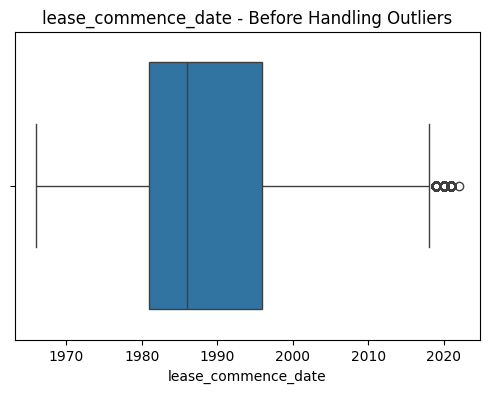

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='lease_commence_date', data=data)
plt.title("lease_commence_date - Before Handling Outliers")
plt.show()

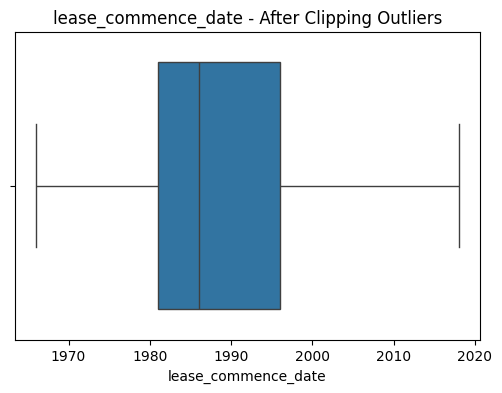

Number of outliers in lease_commence_date after clipping: 0


In [ ]:
data['lease_commence_date'] = data['lease_commence_date'].clip(lower=lower_bound, upper=upper_bound).astype(int)
plt.figure(figsize=(6, 4))
sns.boxplot(x='lease_commence_date', data=data)
plt.title(f"{'lease_commence_date'} - After Clipping Outliers")
plt.show()

outliers_after = data[(data['lease_commence_date'] < lower_bound) | (data['lease_commence_date'] > upper_bound)]['lease_commence_date']
print(f"Number of outliers in {'lease_commence_date'} after clipping:", len(outliers_after))

In [ ]:
data.lease_commence_date.dtypes

dtype('int64')

**remaining_lease**

In [ ]:
Q1 = data['remaining_lease'].quantile(0.25)
Q3 = data['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['remaining_lease'] < lower_bound) | (data['remaining_lease'] > upper_bound)]['remaining_lease']
print(f"Number of outliers in {'remaining_lease'} before clipping:", len(outliers))

Number of outliers in remaining_lease before clipping: 5427


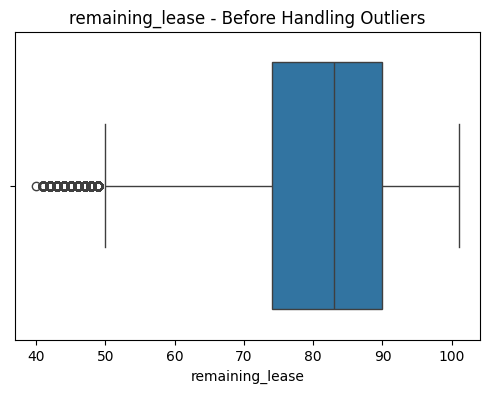

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='remaining_lease', data=data)
plt.title("remaining_lease - Before Handling Outliers")
plt.show()

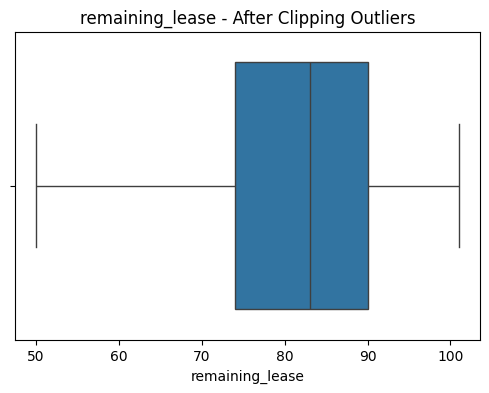

Number of outliers in remaining_lease after clipping: 0


In [ ]:
data['remaining_lease'] = data['remaining_lease'].clip(lower=lower_bound, upper=upper_bound).astype(int)
plt.figure(figsize=(6, 4))
sns.boxplot(x='remaining_lease', data=data)
plt.title(f"{'remaining_lease'} - After Clipping Outliers")
plt.show()

outliers_after = data[(data['remaining_lease'] < lower_bound) | (data['remaining_lease'] > upper_bound)]['remaining_lease']
print(f"Number of outliers in {'remaining_lease'} after clipping:", len(outliers_after))

In [ ]:
data.remaining_lease.dtypes

dtype('int64')

**resale_price**

In [ ]:
Q1 = data['resale_price'].quantile(0.25)
Q3 = data['resale_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['resale_price'] < lower_bound) | (data['resale_price'] > upper_bound)]['resale_price']
print(f"Number of outliers in {'resale_price'} before clipping:", len(outliers))

Number of outliers in resale_price before clipping: 24036


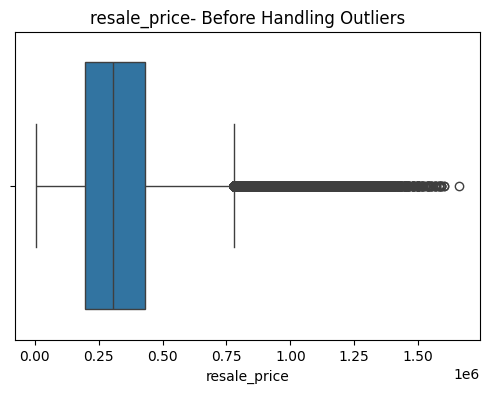

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='resale_price', data=data)
plt.title("resale_price- Before Handling Outliers")
plt.show()

**storey_low**

In [ ]:
Q1 = data['storey_low'].quantile(0.25)
Q3 = data['storey_low'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['storey_low'] < lower_bound) | (data['storey_low'] > upper_bound)]['storey_low']
print(f"Number of outliers in {'storey_low'} before clipping:", len(outliers))

Number of outliers in storey_low before clipping: 16118


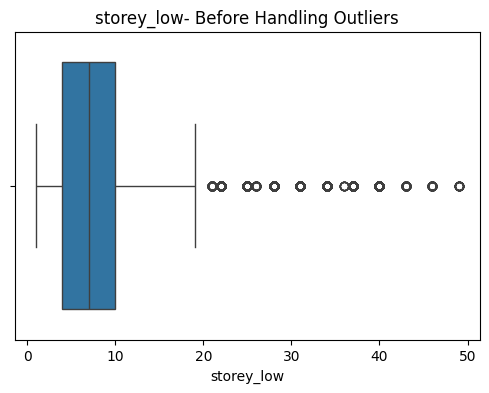

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='storey_low', data=data)
plt.title("storey_low- Before Handling Outliers")
plt.show()

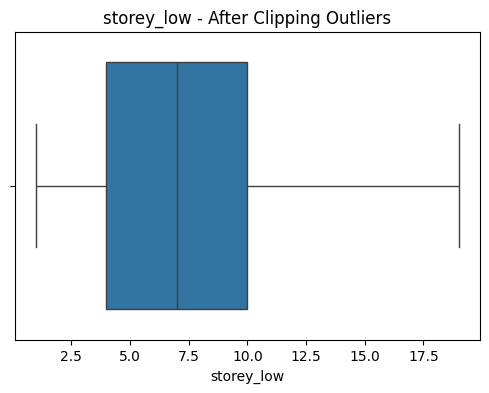

Number of outliers in storey_low after clipping: 0


In [ ]:
data['storey_low'] = data['storey_low'].clip(lower=lower_bound, upper=upper_bound).astype(int)
plt.figure(figsize=(6, 4))
sns.boxplot(x='storey_low', data=data)
plt.title(f"{'storey_low'} - After Clipping Outliers")
plt.show()

outliers_after = data[(data['storey_low'] < lower_bound) | (data['storey_low'] > upper_bound)]['storey_low']
print(f"Number of outliers in {'storey_low'} after clipping:", len(outliers_after))

**storey_high**

In [ ]:
Q1 = data['storey_high'].quantile(0.25)
Q3 = data['storey_high'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['storey_high'] < lower_bound) | (data['storey_high'] > upper_bound)]['storey_high']
print(f"Number of outliers in {'storey_high'} before clipping:", len(outliers))

Number of outliers in storey_high before clipping: 16118


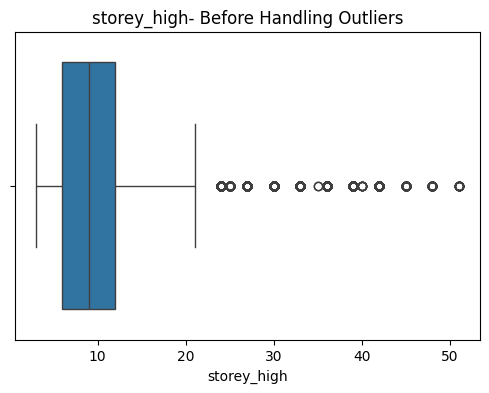

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='storey_high', data=data)
plt.title("storey_high- Before Handling Outliers")
plt.show()

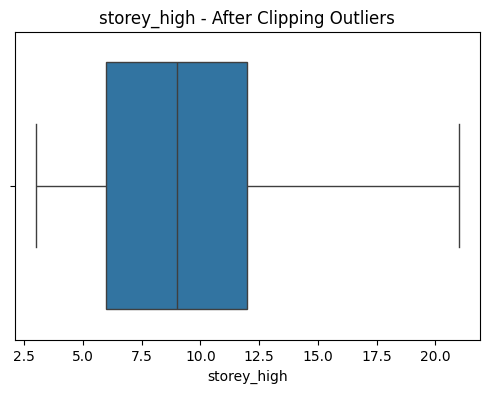

Number of outliers in storey_high after clipping: 0


In [ ]:
data['storey_high'] = data['storey_high'].clip(lower=lower_bound, upper=upper_bound).astype(int)
plt.figure(figsize=(6, 4))
sns.boxplot(x='storey_high', data=data)
plt.title(f"{'storey_high'} - After Clipping Outliers")
plt.show()

outliers_after = data[(data['storey_high'] < lower_bound) | (data['storey_high'] > upper_bound)]['storey_high']
print(f"Number of outliers in {'storey_high'} after clipping:", len(outliers_after))

In [ ]:
data.dtypes

,0
town,object
flat_type,object
block,object
street_name,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
remaining_lease,int64
resale_price,float64
year,int32


**Data visualizations**

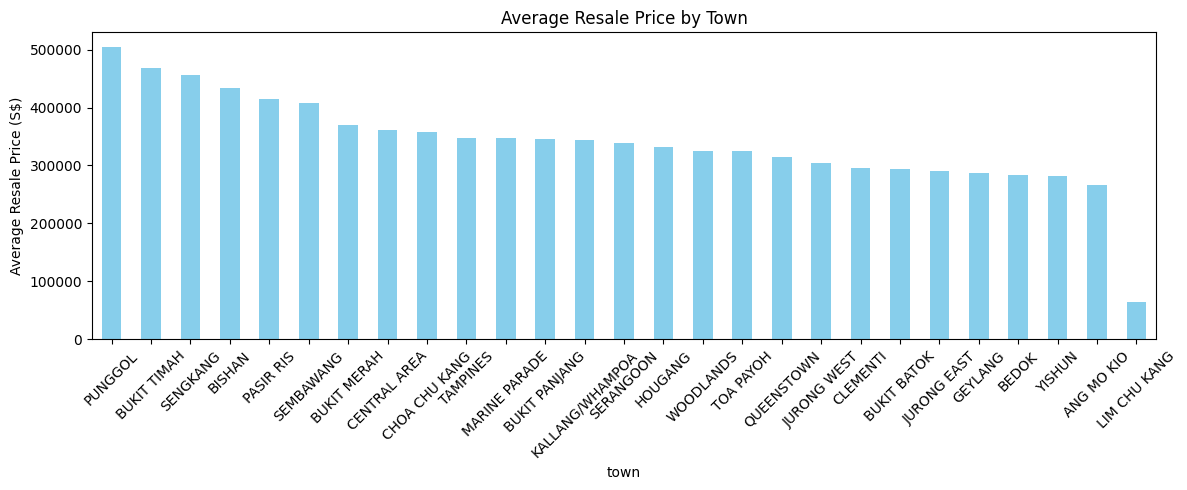

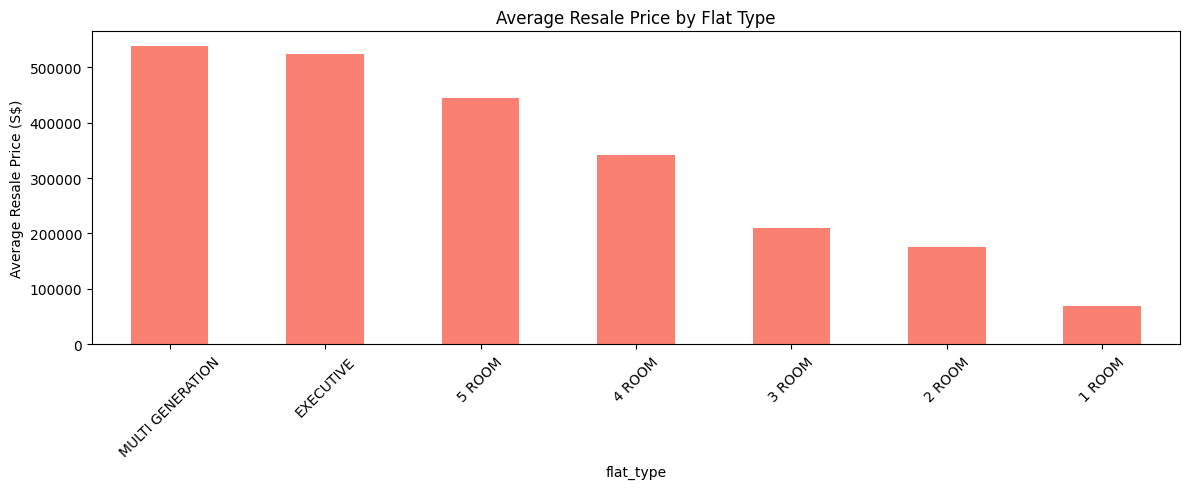

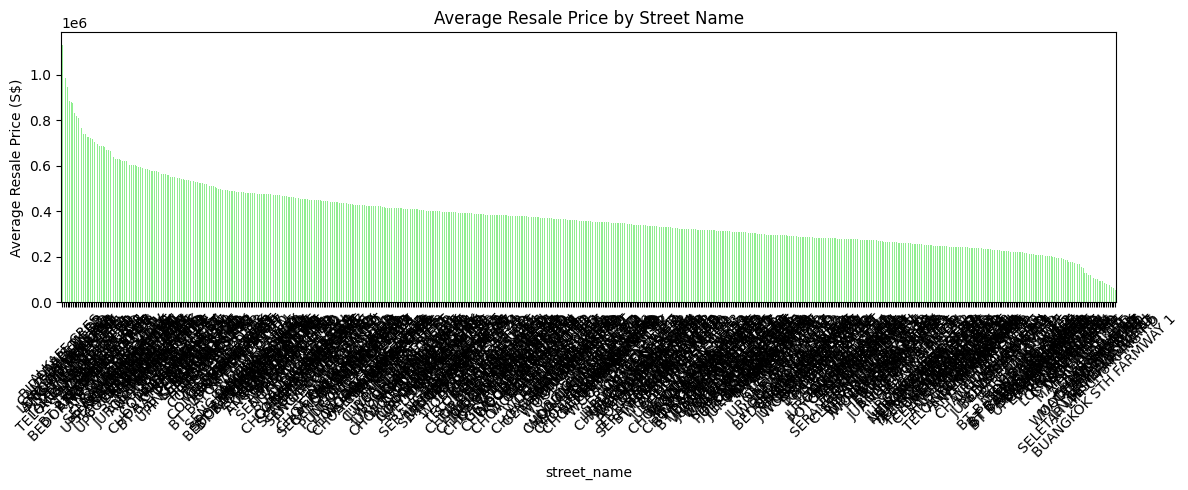

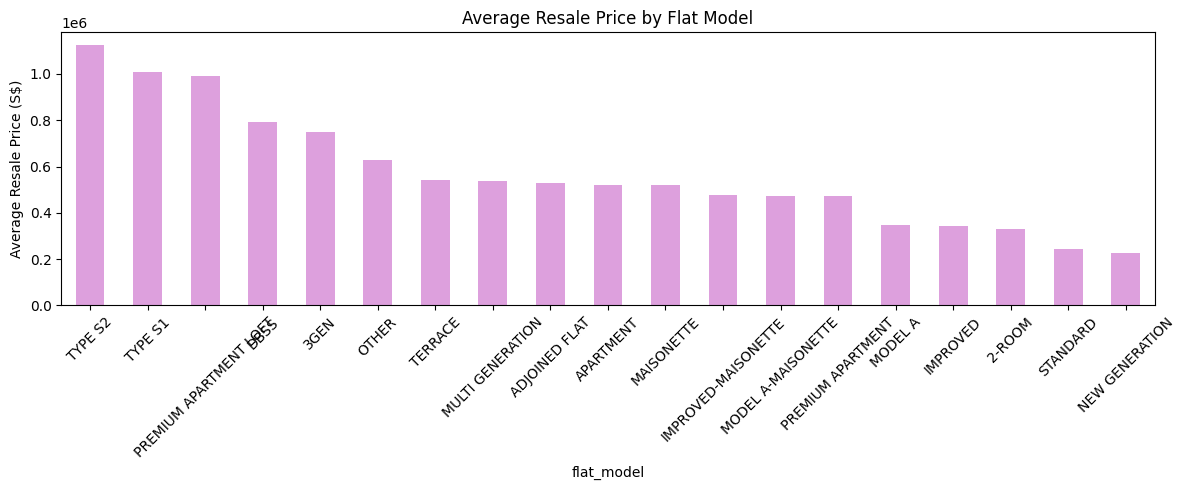

In [ ]:
import matplotlib.pyplot as plt
categorical_cols = ['town', 'flat_type', 'street_name', 'flat_model']
colors = ['skyblue', 'salmon', 'lightgreen', 'plum']
for col, color in zip(categorical_cols, colors):
    grouped = data.groupby(col)['resale_price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 5))
    grouped.plot(kind='bar', color=color)
    plt.xticks(rotation=45)
    plt.ylabel("Average Resale Price (S$)")
    plt.title(f"Average Resale Price by {col.replace('_', ' ').title()}")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1507038360.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=street_price.values, y=street_price.index, palette='magma')


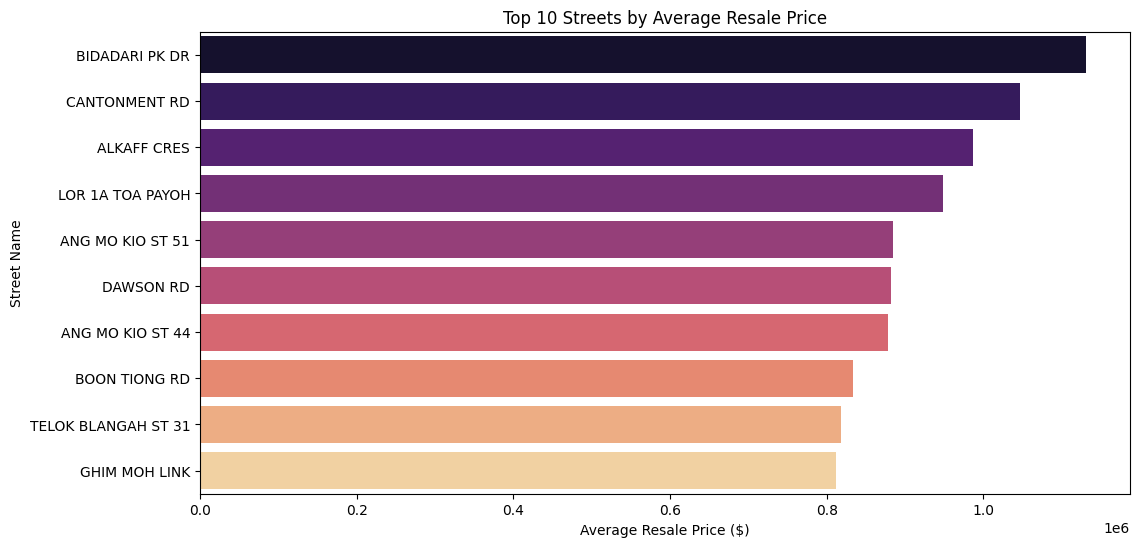

In [ ]:
#Top 10 Streets by Average Resale Price
plt.figure(figsize=(12,6))
street_price = data.groupby('street_name')['resale_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=street_price.values, y=street_price.index, palette='magma')
plt.title('Top 10 Streets by Average Resale Price')
plt.xlabel('Average Resale Price ($)')
plt.ylabel('Street Name')
plt.show()


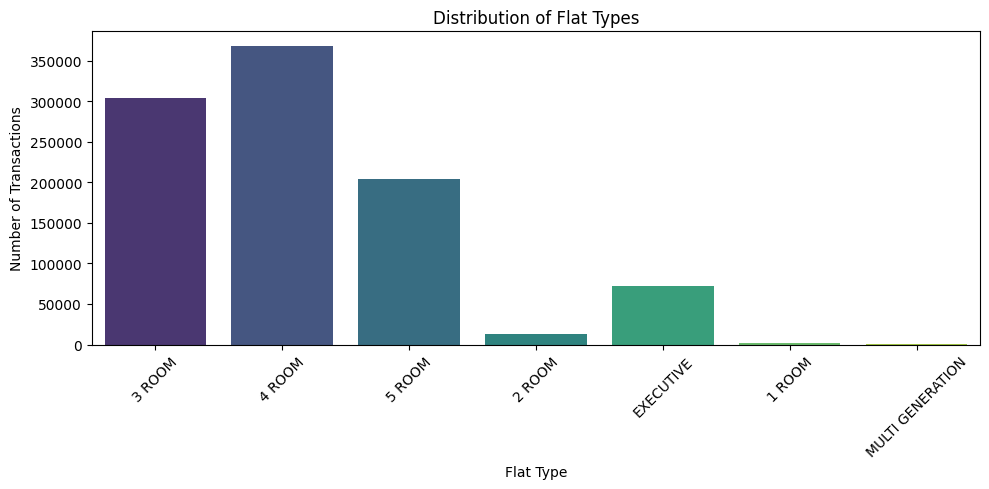

In [ ]:
#Distribution of Flat Types
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='flat_type', hue='flat_type',palette='viridis')
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


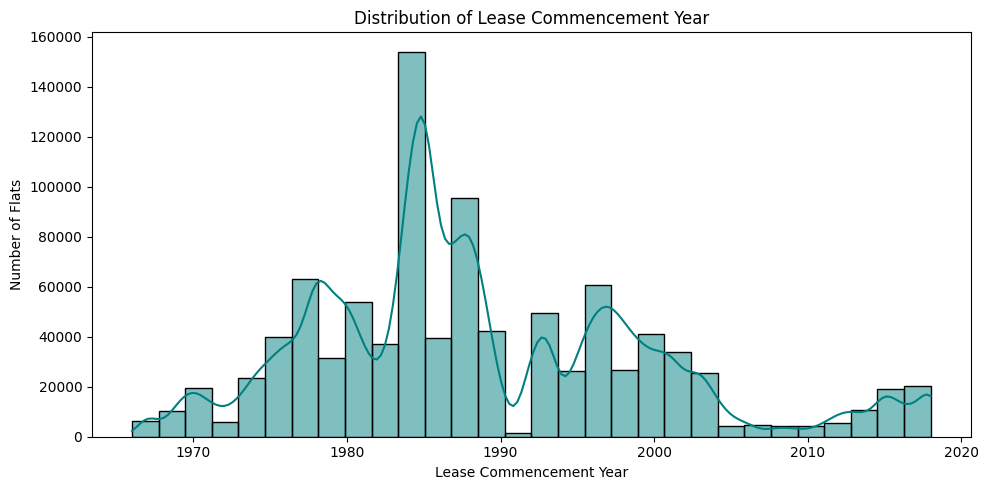

In [ ]:
#Lease Commence Date Distribution
plt.figure(figsize=(10,5))
sns.histplot(data['lease_commence_date'], bins=30, kde=True, color='teal')
plt.title('Distribution of Lease Commencement Year')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Number of Flats')
plt.tight_layout()
plt.show()


**Encoding categorical columns**

Machine learning models only accept numeric inputs.

Label Encoding assigns each category a unique number, making the data usable for algorithms like Random Forest or XGBoost.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['flat_type'] = data['flat_type'].str.upper()
data['flat_type'] = data['flat_type'].str.replace('-', ' ')
data['flat_type'] = le.fit_transform(data['flat_type'])




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['block'] = data['block'].astype(str)
data['block'] = le.fit_transform(data['block'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['town'] = le.fit_transform(data['town'].astype(str))


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['street_name'] = le.fit_transform(data['street_name'].astype(str))


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['flat_model'] = le.fit_transform(data['flat_model'].astype(str))


In [ ]:
data.dtypes

,0
town,int64
flat_type,int64
block,int64
street_name,int64
floor_area_sqm,float64
flat_model,int64
lease_commence_date,int64
remaining_lease,int64
resale_price,float64
year,int32


In [ ]:
data

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_num,storey_low,storey_high
0,0,2,264,18,60.0,5,1986,70,255000.0,2015,1,7,9
1,0,2,1639,15,68.0,11,1981,65,275000.0,2015,1,1,3
2,0,2,218,18,69.0,11,1980,64,285000.0,2015,1,1,3
3,0,2,1263,15,68.0,11,1979,63,290000.0,2015,1,1,3
4,0,2,1669,15,68.0,11,1980,64,290000.0,2015,1,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963851,26,4,438,573,121.0,5,1985,72,476888.0,2012,2,10,12
963852,26,4,2225,583,122.0,5,1986,73,490000.0,2012,2,1,3
963853,26,4,2497,584,122.0,5,1988,75,488000.0,2012,2,1,3
963854,26,5,1977,563,173.0,3,1992,79,705000.0,2012,2,7,9


In [ ]:
data.to_csv("cleaned_resale_data.csv")

In [ ]:
corelation=data.corr()
print(corelation['resale_price'].sort_values(ascending=False))

resale_price           1.000000
year                   0.698452
flat_type              0.559254
lease_commence_date    0.547446
floor_area_sqm         0.531571
storey_high            0.226155
storey_low             0.224099
town                   0.059689
block                  0.038932
street_name            0.028258
month_num              0.008055
remaining_lease       -0.073036
flat_model            -0.230277
Name: resale_price, dtype: float64


Helps identify which factors most strongly influence price

using this to prioritize features or interpret model results.

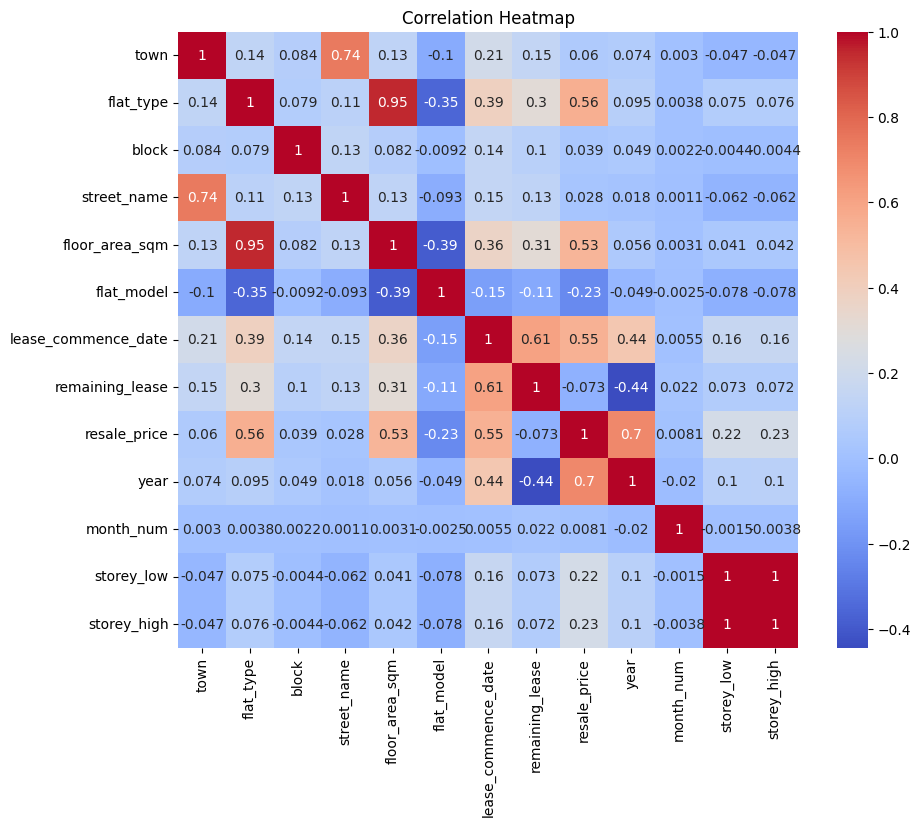

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corelation, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

**Machine Learning**

**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#features
X=data.drop(['resale_price'],axis=1)
y=data['resale_price']#Target

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model
RFR= RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=None,       # let it grow deep
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

#fit the model

RFR.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
#predict the data
y_pred = RFR.predict(X_test)

In [ ]:
#evaluate the model
mae_rfr= mean_absolute_error(y_test, y_pred)
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): ${mae_rfr:,.0f}")
print(f"Mean Squared Error (MSE): {mse_rfr:,.0f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rfr:,.0f}")
print(f"R² Score: {r2_rfr:.3f}")


Model Evaluation Results:
Mean Absolute Error (MAE): $14,974
Mean Squared Error (MSE): 521,623,561
Root Mean Squared Error (RMSE): $22,839
R² Score: 0.984


**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop(columns=['resale_price'])
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

LR= LinearRegression()
LR.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

mae_lr= mean_absolute_error(y_test, y_pred)
mse_lr= mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print("✅ Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae_lr:,.0f}")
print(f"Mean Squared Error (MSE): {mse_lr:,.0f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_lr:,.0f}")
print(f"R² Score: {r2_lr:.3f}")

✅ Linear Regression Model Evaluation:
Mean Absolute Error (MAE): $64,583
Mean Squared Error (MSE): 7,851,021,276
Root Mean Squared Error (RMSE): $88,606
R² Score: 0.765


**Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop(columns=['resale_price'])
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


DT= DecisionTreeRegressor(
    max_depth=15,
    min_samples_split=5,
    random_state=42
)

DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=5, random_state=42)

In [ ]:
y_pred = DT.predict(X_test)

mae_dt= mean_absolute_error(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred)

print("✅ Decision Tree Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae_dt:,.0f}")
print(f"Mean Squared Error (MSE): {mse_dt:,.0f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_dt:,.0f}")
print(f"R² Score: {r2_dt:.3f}")

✅ Decision Tree Model Evaluation:
Mean Absolute Error (MAE): $25,491
Mean Squared Error (MSE): 1,606,869,864
Root Mean Squared Error (RMSE): $40,086
R² Score: 0.952


**XGBoost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

X = data.drop(columns=['resale_price'])
y = data['resale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


XGB= xgb.XGBRegressor(
    n_estimators=100,          # number of trees
    max_depth=6,               # depth of each tree
    learning_rate=0.1,         # step size shrinkage
    subsample=0.8,             # row sampling
    colsample_bytree=0.8,      # feature sampling
    random_state=42,
    n_jobs=-1
)


XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = XGB.predict(X_test)

mae_xg = mean_absolute_error(y_test, y_pred)
mse_xg = mean_squared_error(y_test, y_pred)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred)

print("✅ XGBoost Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae_xg:,.0f}")
print(f"Mean Squared Error (MSE): {mse_xg:,.0f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_xg:,.0f}")
print(f"R² Score: {r2_xg:.3f}")


✅ XGBoost Model Evaluation:
Mean Absolute Error (MAE): $22,585
Mean Squared Error (MSE): 1,107,381,165
Root Mean Squared Error (RMSE): $33,277
R² Score: 0.967


In [ ]:

model_scores = {
    "Model": ["Random Forest", "Linear Regression", "Decision Tree", "XGBoost"],
    "MSE":[mse_rfr, mse_lr, mse_dt, mse_xg],
    "MAE": [mae_rfr, mae_lr, mae_dt, mae_xg],
    "RMSE": [rmse_rfr, rmse_lr, rmse_dt, rmse_xg],
    "R2": [r2_rfr, r2_lr, r2_dt, r2_xg]
}

import pandas as pd
scores_df = pd.DataFrame(model_scores)
scores_df


,Model,MSE,MAE,RMSE,R2
0,Random Forest,5.216236e+08,14973.777162,22839.079688,0.984357
1,Linear Regression,7.851021e+09,64582.852230,88605.988941,0.764560
2,Decision Tree,1.606870e+09,25491.465908,40085.781322,0.951812
3,XGBoost,1.107381e+09,22585.213549,33277.337104,0.966791


**Visualizing the model performance**

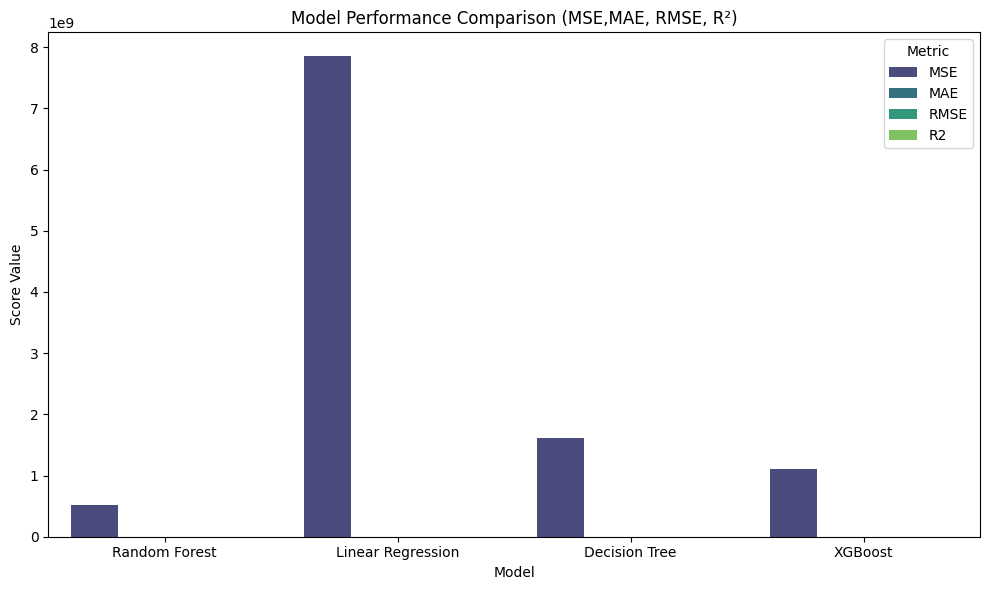

In [ ]:
scores_melted = scores_df.melt(id_vars="Model",
                               value_vars=["MSE","MAE", "RMSE", "R2"],
                               var_name="Metric",
                               value_name="Score")

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=scores_melted, x="Model", y="Score", hue="Metric", palette="viridis")
# Titles and labels
plt.title("Model Performance Comparison (MSE,MAE, RMSE, R²)")
plt.ylabel("Score Value")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [ ]:
import joblib
#Save the trained model
joblib.dump(RFR, "resale_price_model.pkl")
print("Model saved as resale_price_model.pkl")


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Copy your model to a folder in Google Drive
shutil.copy('resale_price_model.pkl', '/content/drive/MyDrive/resale_price_model.joblib')



**About the project**

🏠 HDB Resale Price Prediction — Project Overview
🎯 Objective

To predict HDB resale flat prices in Singapore using historical data and identify key factors affecting pricing.

📊 Data Summary

The dataset includes flat details such as town, block, street, flat type, model, storey range, floor area, lease year, and resale price.
Data was cleaned, merged, and standardized. Missing values were handled, outliers removed, and categorical data encoded for modeling.

⚙️ Approach

Extracted features like year, month, storey_low, and storey_high

Engineered remaining lease using lease start and transaction year

Performed EDA to identify pricing patterns and correlations

Trained multiple models: Linear Regression, Decision Tree, Random Forest, and XGBoost

🏆 Results

XGBoost achieved the best accuracy (highest R², lowest MAE/RMSE)

Floor area, remaining lease, and location (town) were the top predictors

Newer, larger, higher-floor flats had higher resale values

💾 Output

Final model saved as resale_price_model.pkl for future predictions and deployment.

**Discussion & Questions**

1.Which factors most strongly influence HDB resale prices — floor area, lease duration, or location?

2.How does handling missing values and outliers affect the quality and accuracy of the model?

3.Why did XGBoost perform better than Linear Regression or Decision Tree models in this dataset?

4.What external factors (e.g., nearby MRT, amenities, schools) might also impact resale prices but are not included here?

5.How can the model be improved with more advanced feature engineering or data (like coordinates or economic indicators)?

6.Can this model be deployed in a web or mobile app to help predict resale prices in real time?